<a href="https://colab.research.google.com/github/andreytusur/andreytusur/blob/main/homework_4_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## California Housing Dataset

**Назначение:** Прогнозирование медианной стоимости домов в Калифорнии на основе географических и демографических характеристик.

**Основные характеристики:**
- **Объем:** 20,640 наблюдений
- **Признаки:** 8 числовых характеристик
- **Целевая переменная:** Медианная стоимость дома (в сотнях тысяч долларов)

**Ключевые признаки:**
- MedInc - медианный доход в районе
- HouseAge - средний возраст домов
- AveRooms - среднее количество комнат
- AveBedrms - среднее количество спален
- Population - население района
- AveOccup - средняя заполняемость домов
- Latitude - географическая широта
- Longitude - географическая долгота

Источник: https://keras.io/api/datasets/california_housing/

In [ ]:
!pip install pd matplotlib seaborn numpy tensorflow scipy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import ks_2samp


**Загрузка набора данных о стоимости домов в Калифорнии**

In [ ]:
# Загрузка данных о ценах на жилье в Калифорнии для задачи регрессии.
from sklearn.datasets import fetch_california_housing

# Загружаем DataSet
data_california_housing = fetch_california_housing()

In [ ]:
# Выводим доступные атрибуты в DataSet
print("Доступные атрибуты:\n")
print(data_california_housing.keys(), '\n')

# Выводим названия характеристик (признаков) каждого наблюдения
print("Названия характеристик (признаков):\n")
print(data_california_housing.feature_names,'\n')

# Выводим размерность матрицы признаков
print("Размерность матрицы признаков:\n")
print(data_california_housing.data.shape, '\n')

# Выводим размерность вектора целевых переменных (меток классов)
print("Размерность вектора целевых переменных (меток классов):\n")
print(data_california_housing.target.shape, '\n')

# Выводим подробное текстовое описание набора данных
print("Подробное текстовое описание набора данных:\n")
print(data_california_housing.DESCR, '\n')

Доступные атрибуты:

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR']) 

Названия характеристик (признаков):

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] 

Размерность матрицы признаков:

(20640, 8) 

Размерность вектора целевых переменных (меток классов):

(20640,) 

Подробное текстовое описание набора данных:

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latit

In [ ]:
# Создаем DataFrame из данных о калифорнийском жилье
california_original = pd.DataFrame(data_california_housing.data)

# Присваиваем столбцам названия из набора данных
california_original.columns = data_california_housing.feature_names[:]

# Добавляем целевую переменную - медианную стоимость жилья (в 100 000 долларов)
california_original['MedianValue'] = data_california_housing.target

# Выводим первые 5 строк для проверки результата
california_original.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Получаем размерность DataFrame
total_variables, total_observations = california_original.shape
print(f"Всего в наборе: {total_variables} переменных.")
print(f"Всего в наборе: {total_observations} наблюдений.")

Всего в наборе: 20640 переменных.
Всего в наборе: 9 наблюдений.


In [ ]:
# Проверяем набор данных на нулевые значения
print("Наличие нулевых значений: ", california_original.isnull().any().any())

Наличие нулевых значений:  False


In [ ]:
# Анализ распределения цен
print("Описательная статистика цен:")
print(f"Минимум: {california_original['MedianValue'].min():.2f}")
print(f"5-й перцентиль: {np.percentile(california_original['MedianValue'], 5):.2f}")
print(f"25-й перцентиль (Q1): {np.percentile(california_original['MedianValue'], 25):.2f}")
print(f"Медиана: {california_original['MedianValue'].median():.2f}")
print(f"75-й перцентиль (Q3): {np.percentile(california_original['MedianValue'], 75):.2f}")
print(f"95-й перцентиль: {np.percentile(california_original['MedianValue'], 95):.2f}")
print(f"Максимум: {california_original['MedianValue'].max():.2f}")

Описательная статистика цен:
Минимум: 0.15
5-й перцентиль: 0.66
25-й перцентиль (Q1): 1.20
Медиана: 1.80
75-й перцентиль (Q3): 2.65
95-й перцентиль: 4.90
Максимум: 5.00


In [ ]:
# Определение границ выбрасов цен (25-й (настоящий Q1) и 75-й (настоящий Q3) перцентиль)
Q1_price = np.percentile(california_original['MedianValue'], 25)
Q3_price = np.percentile(california_original['MedianValue'], 75)
IQR_price = Q3_price - Q1_price

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

print(f"\nОпределены границы выбросов:")
print(f"Q1 (25-й перцентиль): {Q1_price:.2f}")
print(f"Q3 (75-й перцентиль): {Q3_price:.2f}")
print(f"IQR: {IQR_price:.2f}")
print(f"Нижняя граница: {lower_bound_price:.2f}")
print(f"Верхняя граница: {upper_bound_price:.2f}")

# Находим выбросы
outliers_mask = (california_original['MedianValue'] < lower_bound_price) | \
               (california_original['MedianValue'] > upper_bound_price)

print(f"\nНайдено выбросов по ценам: {outliers_mask.sum()}")



Определены границы выбросов:
Q1 (25-й перцентиль): 1.20
Q3 (75-й перцентиль): 2.65
IQR: 1.45
Нижняя граница: -0.98
Верхняя граница: 4.82

Найдено выбросов по ценам: 1071


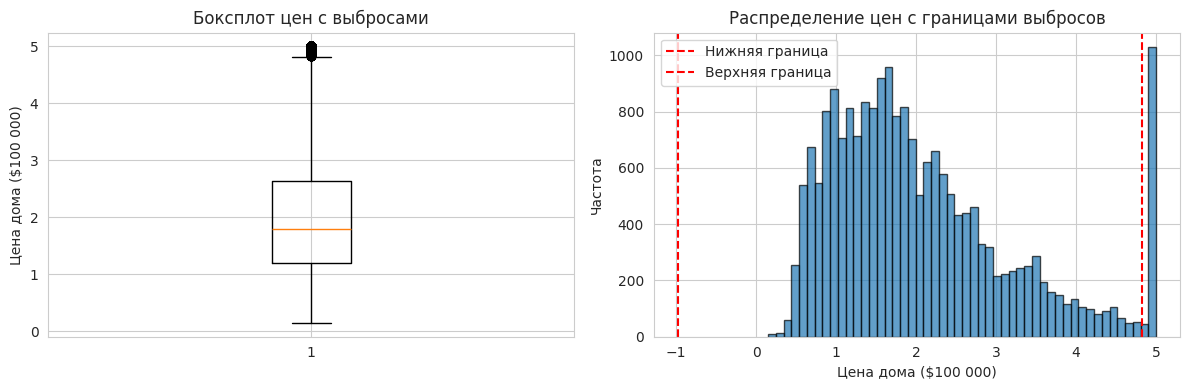

In [ ]:
# Визуализация выбросов
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.boxplot(california_original['MedianValue'])
plt.ylabel('Цена дома ($100 000)')
plt.title('Боксплот цен с выбросами')

plt.subplot(1, 2, 2)
plt.hist(california_original['MedianValue'], bins=50, alpha=0.7, edgecolor='black')
plt.axvline(lower_bound_price, color='red', linestyle='--', label='Нижняя граница')
plt.axvline(upper_bound_price, color='red', linestyle='--', label='Верхняя граница')
plt.xlabel('Цена дома ($100 000)')
plt.ylabel('Частота')
plt.legend()
plt.title('Распределение цен с границами выбросов')
plt.tight_layout()
plt.show()

In [ ]:
# Удаляем выбросы
california_clean = california_original[~outliers_mask].copy()

print(f"Размер после очистки цен: {california_clean.shape}")
print(f"Удалено {outliers_mask.sum()} записей ({outliers_mask.sum()/len(california_original)*100:.1f}%)")

Размер после очистки цен: (19569, 9)
Удалено 1071 записей (5.2%)


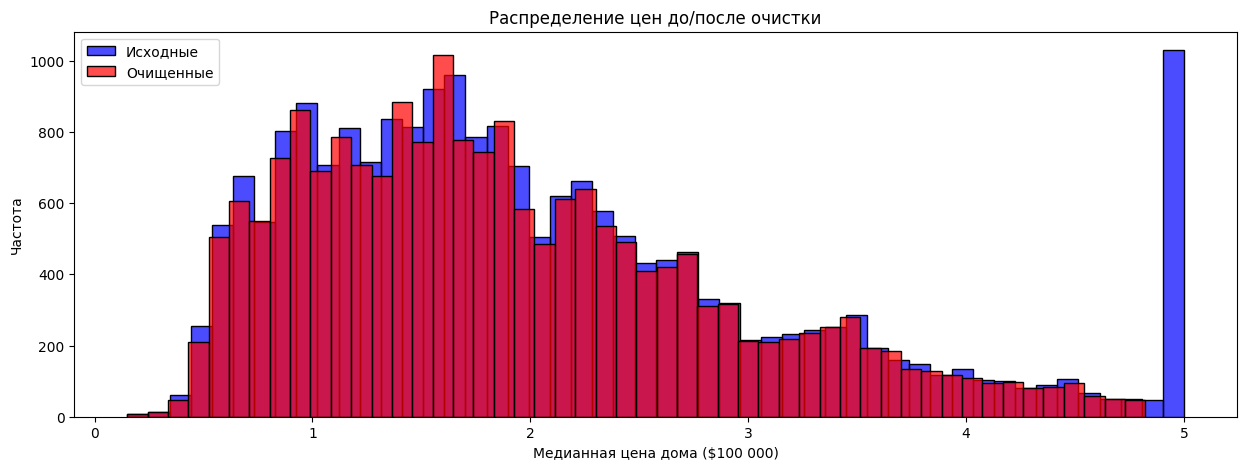

In [ ]:
plt.figure(figsize=(15, 5))

# Сравним распределения цен до и после очистки от выбросов
sns.histplot(data=california_original['MedianValue'], bins=50, alpha=0.7, label='Исходные', color='blue')
sns.histplot(data=california_clean['MedianValue'], bins=50, alpha=0.7, label='Очищенные', color='red')
plt.xlabel('Медианная цена дома ($100 000)')
plt.ylabel('Частота')
plt.legend()
plt.title('Распределение цен до/после очистки')
plt.show()


Text(0.5, 1.0, 'Доход и Цены до/после очистки')

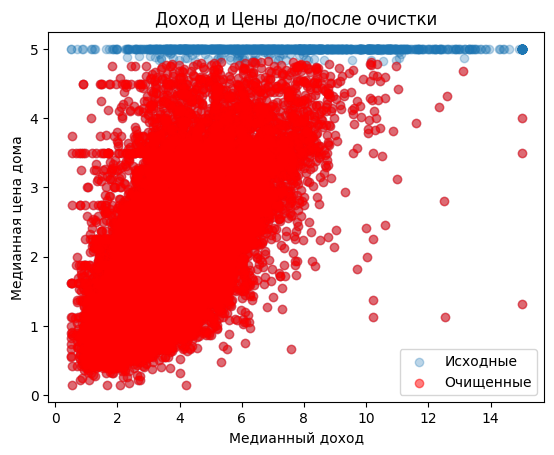

In [ ]:
# Сравнение дохода и цены
plt.scatter(california_original['MedInc'], california_original['MedianValue'],
           alpha=0.3, label='Исходные')
plt.scatter(california_clean['MedInc'], california_clean['MedianValue'],
           alpha=0.5, label='Очищенные', color='red')
plt.xlabel('Медианный доход')
plt.ylabel('Медианная цена дома')
plt.legend()
plt.title('Доход и Цены до/после очистки')


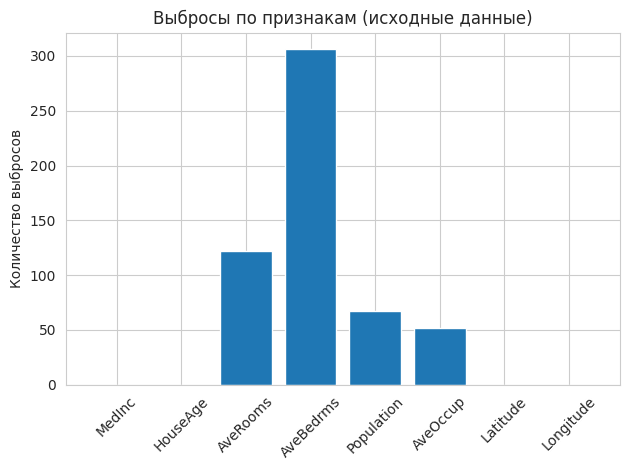

In [ ]:
# Количество выбросов по признакам
outliers_count = []
for column in california_original.columns[:-1]:
    Q1 = np.percentile(california_original[column], 5)
    Q3 = np.percentile(california_original[column], 95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((california_original[column] < lower) | (california_original[column] > upper)).sum()
    outliers_count.append(outliers)

plt.bar(california_original.columns[:-1], outliers_count)
plt.xticks(rotation=45)
plt.ylabel('Количество выбросов')
plt.title('Выбросы по признакам (исходные данные)')
plt.tight_layout()
plt.show()


In [ ]:
# Сравним размер данных
print(f"\nСравнение размеров данных:")
print(f"Исходные: {california_original.shape}")
print(f"Очищенные: {california_clean.shape}")
print(f"Удалено записей: {len(california_original) - len(california_clean)}")


Сравнение размеров данных:
Исходные: (20640, 9)
Очищенные: (19569, 9)
Удалено записей: 1071


In [ ]:
# Статистика для оригинальных данных
statistics_original = pd.DataFrame({
    'Observations': california_original.count(), # Количество налюдений
    'Mean': california_original.mean(), # Среднее значение
    'SD' : california_original.std(), # Стандартное отклонение
    'Min': california_original.min(), # Минимальное значение
    'Median': california_original.median(), # Медиана
    'Max': california_original.max(), # Максимальное значение
    })

# Выводим статистические показатели
statistics_original

,Observations,Mean,SD,Min,Median,Max
MedInc,20640,3.870671,1.899822,0.499900,3.534800,15.000100
HouseAge,20640,28.639486,12.585558,1.000000,29.000000,52.000000
AveRooms,20640,5.429000,2.474173,0.846154,5.229129,141.909091
AveBedrms,20640,1.096675,0.473911,0.333333,1.048780,34.066667
Population,20640,1425.476744,1132.462122,3.000000,1166.000000,35682.000000
AveOccup,20640,3.070655,10.386050,0.692308,2.818116,1243.333333
Latitude,20640,35.631861,2.135952,32.540000,34.260000,41.950000
Longitude,20640,-119.569704,2.003532,-124.350000,-118.490000,-114.310000
MedianValue,20640,2.068558,1.153956,0.149990,1.797000,5.000010


In [ ]:
# Статистика для очищенных данных
statistics_clean = pd.DataFrame({
    'Observations': california_clean.count(),
    'Mean': california_clean.mean(),
    'SD': california_clean.std(),
    'Min': california_clean.min(),
    'Median': california_clean.median(),
    'Max': california_clean.max(),
})

# Выводим статистические показатели
statistics_clean

,Observations,Mean,SD,Min,Median,Max
MedInc,19569,3.665568,1.557927,0.499900,3.441200,15.000100
HouseAge,19569,28.352752,12.497772,1.000000,28.000000,52.000000
AveRooms,19569,5.357548,2.294996,0.846154,5.181818,132.533333
AveBedrms,19569,1.096695,0.452836,0.333333,1.048588,34.066667
Population,19569,1442.788952,1145.011369,3.000000,1181.000000,35682.000000
AveOccup,19569,3.098760,10.660526,0.692308,2.839009,1243.333333
Latitude,19569,35.654159,2.151007,32.540000,34.270000,41.950000
Longitude,19569,-119.562786,2.005764,-124.350000,-118.510000,-114.310000
MedianValue,19569,1.908523,0.954386,0.149990,1.732000,4.822000


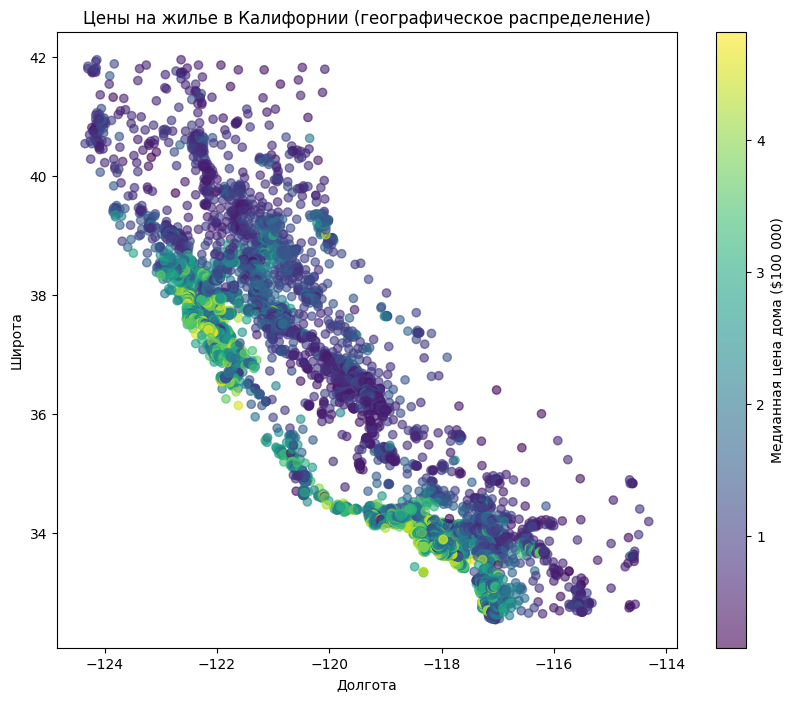

In [ ]:
# Географическое распределение цен
plt.figure(figsize=(10,8))
plt.scatter(california_clean['Longitude'], california_clean['Latitude'],
           c=california_clean['MedianValue'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Медианная цена дома ($100 000)')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Цены на жилье в Калифорнии (географическое распределение)')
plt.show()

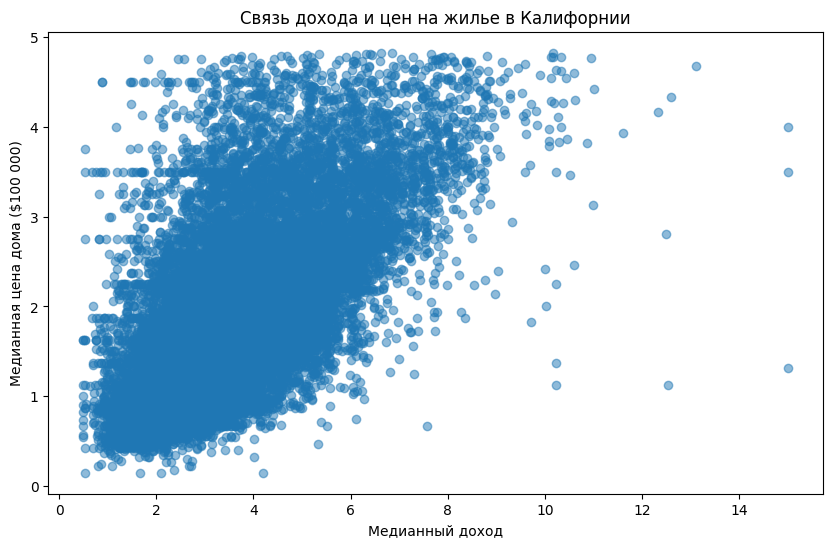

In [ ]:
# Влияние дохода на цены
plt.figure(figsize=(10,6))
plt.scatter(california_clean['MedInc'], california_clean['MedianValue'], alpha=0.5)
plt.xlabel('Медианный доход')
plt.ylabel('Медианная цена дома ($100 000)')
plt.title('Связь дохода и цен на жилье в Калифорнии')
plt.show()

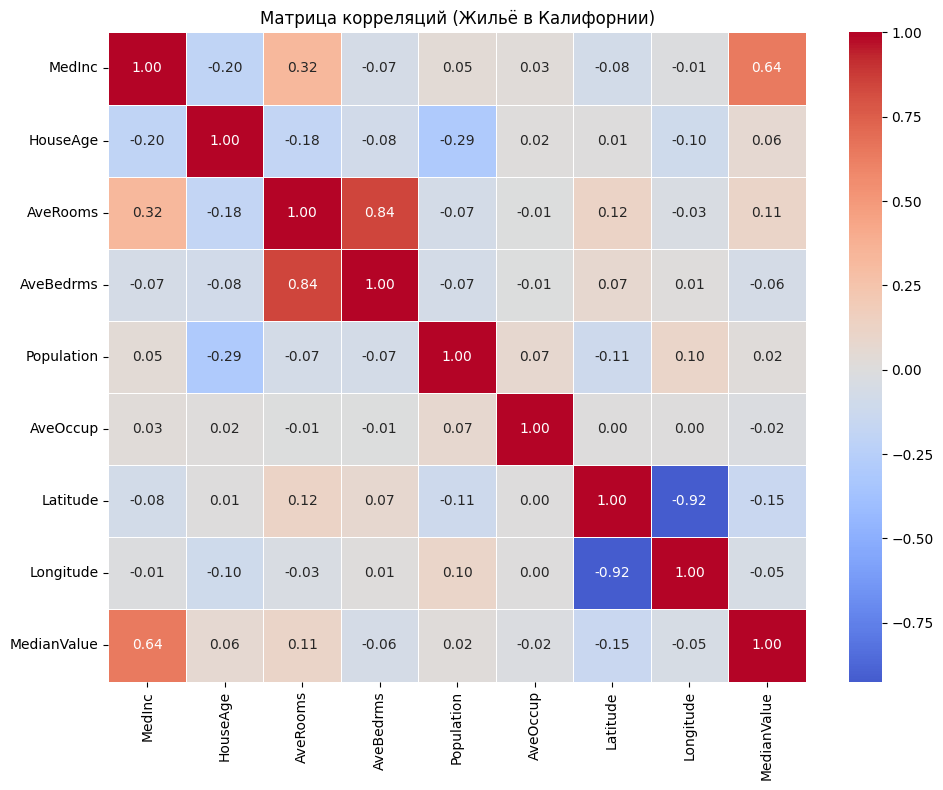

In [ ]:
# Матрица теплоты корреляций
plt.figure(figsize=(10,8))
sns.heatmap(california_clean.corr(), annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций (Жильё в Калифорнии)')
plt.tight_layout()
plt.show()

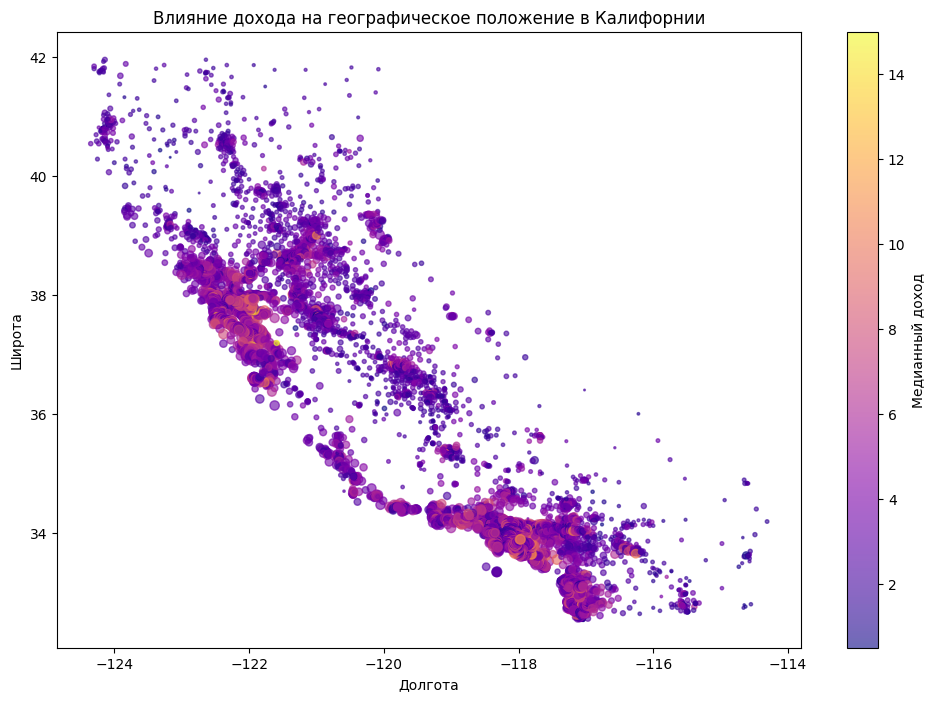

In [ ]:
# Влияние дохода на географическое положение

plt.figure(figsize=(12,8))
scatter = plt.scatter(california_clean['Longitude'], california_clean['Latitude'],
                     c=california_clean['MedInc'], s=california_clean['MedianValue']*10,
                     cmap='plasma', alpha=0.6)
plt.colorbar(scatter, label='Медианный доход')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Влияние дохода на географическое положение в Калифорнии')
plt.show()

Text(0.5, 1.0, 'Распределение цен в Северной и Южной Калифорнии')

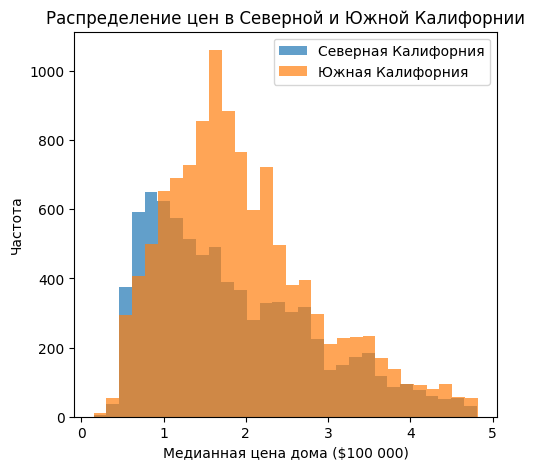

In [ ]:
# Разделение на Северную/Южную Калифорнию
northern_ca = california_clean[california_clean['Latitude'] > 36.5]  # Северная Калифорния
southern_ca = california_clean[california_clean['Latitude'] <= 36.5]  # Южная Калифорния

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(northern_ca['MedianValue'], bins=30, alpha=0.7, label='Северная Калифорния')
plt.hist(southern_ca['MedianValue'], bins=30, alpha=0.7, label='Южная Калифорния')
plt.xlabel('Медианная цена дома ($100 000)')
plt.ylabel('Частота')
plt.legend()
plt.title('Распределение цен в Северной и Южной Калифорнии')

In [ ]:
# Анализируем выбросы перед анализом влияния количества комнат на стоимость жилья
print("Анализ выбросов в количестве комнат:")
print(f"95-й перцентиль: {california_clean['AveRooms'].quantile(0.95):.2f}")
print(f"99-й перцентиль: {california_clean['AveRooms'].quantile(0.99):.2f}")
print(f"Максимум: {california_clean['AveRooms'].max():.2f}")
print(f"Доля данных > 10 комнат: {(california_clean['AveRooms'] > 10).mean()*100:.1f}%")

Анализ выбросов в количестве комнат:
95-й перцентиль: 7.36
99-й перцентиль: 10.29
Максимум: 132.53
Доля данных > 10 комнат: 1.1%


Исключено 196 выбросов из 19569 записей


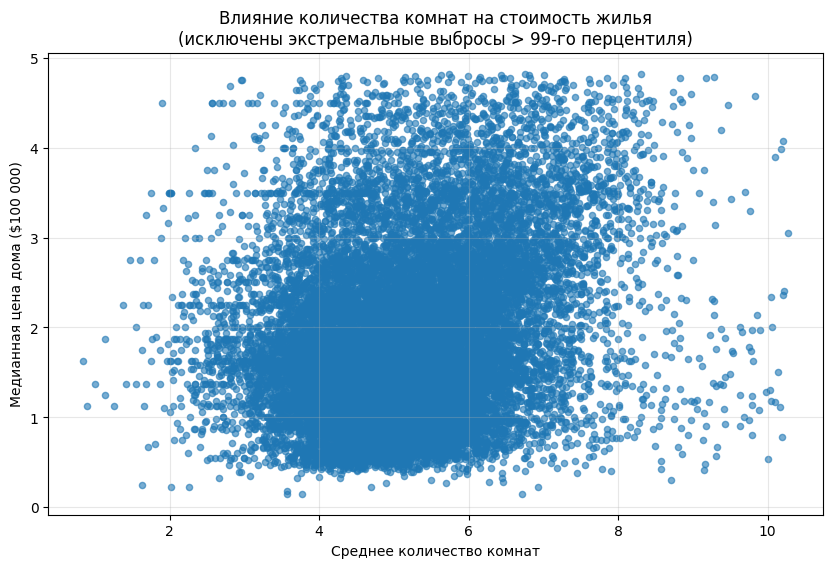

In [ ]:
# Анализ влияния количества комнат на стоимость жилья
q99 = california_clean['AveRooms'].quantile(0.99)
filtered_data = california_clean[california_clean['AveRooms'] <= q99]

print(f"Исключено {len(california_clean) - len(filtered_data)} выбросов из {len(california_clean)} записей")

plt.figure(figsize=(10,6))
plt.scatter(filtered_data['AveRooms'], filtered_data['MedianValue'], alpha=0.6, s=20)
plt.xlabel('Среднее количество комнат')
plt.ylabel('Медианная цена дома ($100 000)')
plt.title('Влияние количества комнат на стоимость жилья\n(исключены экстремальные выбросы > 99-го перцентиля)')
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1200x1000 with 0 Axes>

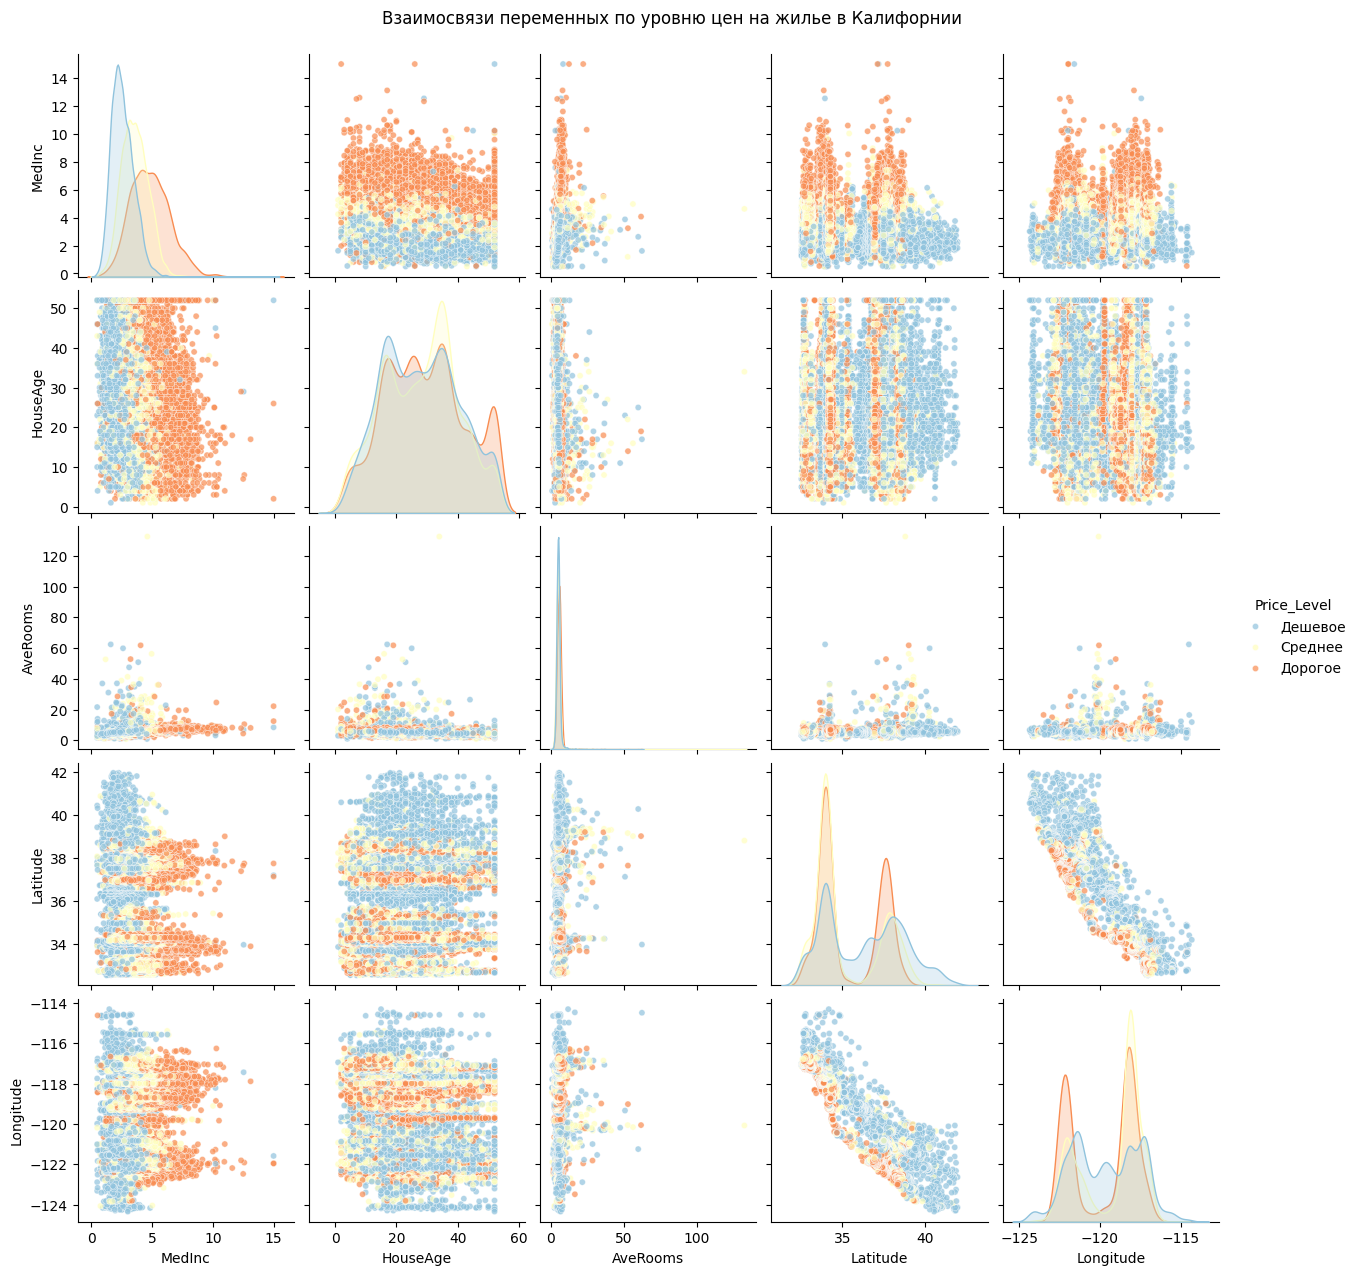

In [ ]:
# Взаимосвязи переменных по уровню цен на жилье в Калифорнии
california_clean['Price_Level'] = pd.qcut(california_clean['MedianValue'], 3,
                                   labels=['Дешевое', 'Среднее', 'Дорогое'])

plt.figure(figsize=(12, 10))
sns.pairplot(california_clean[['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude', 'Price_Level']],
             hue='Price_Level',
             palette='RdYlBu_r',
             diag_kind='kde',
             plot_kws={'alpha': 0.7, 's': 20})
plt.suptitle('Взаимосвязи переменных по уровню цен на жилье в Калифорнии', y=1.02)
plt.show()

In [ ]:
# Фиксируем seed
random_state=2025
np.random.seed(random_state)

original_columns = data_california_housing.feature_names + ['MedianValue']
california_clean = california_clean[original_columns]


# Разделяем очищенные данные на признаки и целевую переменную
x_clean = california_clean.drop('MedianValue', axis=1)  # признаки
y_clean = california_clean['MedianValue']               # целевая переменная

print("Разделение очищенных данных:")
print(f"Размер очищенных данных: {california_clean.shape}")
print(f"Признаки: {x_clean.shape}")
print(f"Целевая переменная: {y_clean.shape}")

#print(california_clean.head())


Разделение очищенных данных:
Размер очищенных данных: (19569, 9)
Признаки: (19569, 8)
Целевая переменная: (19569,)


In [ ]:
# Разделяем данные
x_train, x_test, y_train, y_test = train_test_split(
    x_clean,          # используем очищенные признаки
    y_clean,          # используем очищенные цены
    test_size=0.2,    # 20% данных - тестовая выборка, 80% - обучающая
    random_state=random_state
)

In [ ]:
# Создаем DataFrame из очищенных данных
california_train = pd.DataFrame(x_train, columns=data_california_housing.feature_names)
california_train['MedianValue'] = y_train

california_test = pd.DataFrame(x_test, columns=data_california_housing.feature_names)
california_test['MedianValue'] = y_test

print("\nРазмеры очищенных выборок:")
print(f"Обучающая: {california_train.shape}")
print(f"Тестовая: {california_test.shape}")

# Проверяем распределение целевой переменной после очистки
print("\nРаспределение цен (после очистки):")
print("Обучающая выборка - Среднее:", california_train['MedianValue'].mean())
print("Тестовая выборка - Среднее:", california_test['MedianValue'].mean())
print("Обучающая выборка - Стандартное отклонение:", california_train['MedianValue'].std())
print("Тестовая выборка - Стандартное отклонение:", california_test['MedianValue'].std())

# Сравнение с исходными данными
print("\nСравнение с исходными данными:")
original_mean = data_california_housing.target.mean()
clean_mean = california_clean['MedianValue'].mean()
print(f"Средняя цена (исходные): {original_mean:.3f}")
print(f"Средняя цена (очищенные): {clean_mean:.3f}")
print(f"Разница: {abs(original_mean - clean_mean):.3f}")


Размеры очищенных выборок:
Обучающая: (15655, 9)
Тестовая: (3914, 9)

Распределение цен (после очистки):
Обучающая выборка - Среднее: 1.905020694346854
Тестовая выборка - Среднее: 1.9225314230965767
Обучающая выборка - Стандартное отклонение: 0.9515218042700162
Тестовая выборка - Стандартное отклонение: 0.9657505803843692

Сравнение с исходными данными:
Средняя цена (исходные): 2.069
Средняя цена (очищенные): 1.909
Разница: 0.160


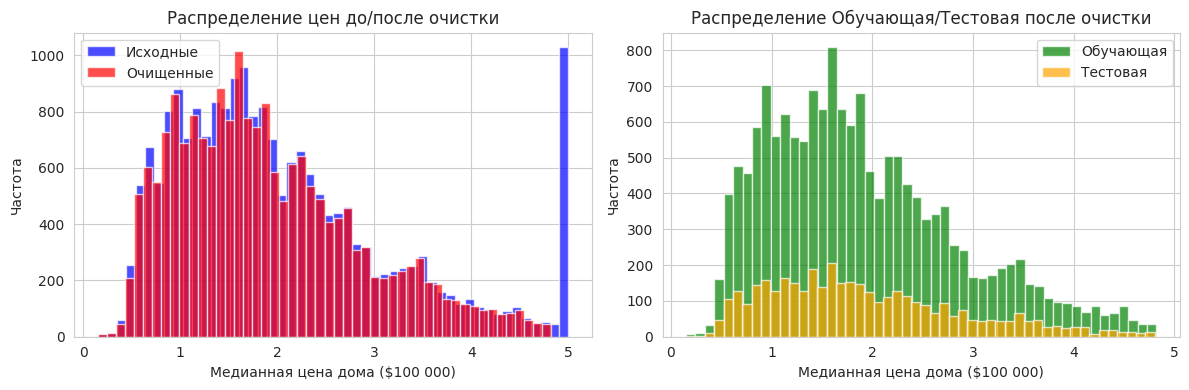

In [ ]:
# Визуализация сравнения распределений
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(data_california_housing.target, bins=50, alpha=0.7, label='Исходные', color='blue')
plt.hist(y_clean, bins=50, alpha=0.7, label='Очищенные', color='red')
plt.xlabel('Медианная цена дома ($100 000)')
plt.ylabel('Частота')
plt.legend()
plt.title('Распределение цен до/после очистки')

plt.subplot(1, 2, 2)
plt.hist(y_train, bins=50, alpha=0.7, label='Обучающая', color='green')
plt.hist(y_test, bins=50, alpha=0.7, label='Тестовая', color='orange')
plt.xlabel('Медианная цена дома ($100 000)')
plt.ylabel('Частота')
plt.legend()
plt.title('Распределение Обучающая/Тестовая после очистки')

plt.tight_layout()
plt.show()

**Нашёл в интернете тест Колмогорова-Смирнова для проверки схожести распределений**

In [ ]:
# Тест Колмогорова-Смирнова для проверки схожести распределений
ks_stat, p_value = ks_2samp(y_train, y_test)
print(f"\nПроверка качества разделения (тест Колмогорова-Смирнова):")
print(f"p-value: {p_value:.4f}")
if p_value > 0.05:
    print("Распределения Обучающая и Тестовая статистически не отличаются")
else:
    print("Распределения Обучающая и Тестовая могут отличаться")


Проверка качества разделения (тест Колмогорова-Смирнова):
p-value: 0.4186
Распределения Обучающая и Тестовая статистически не отличаются


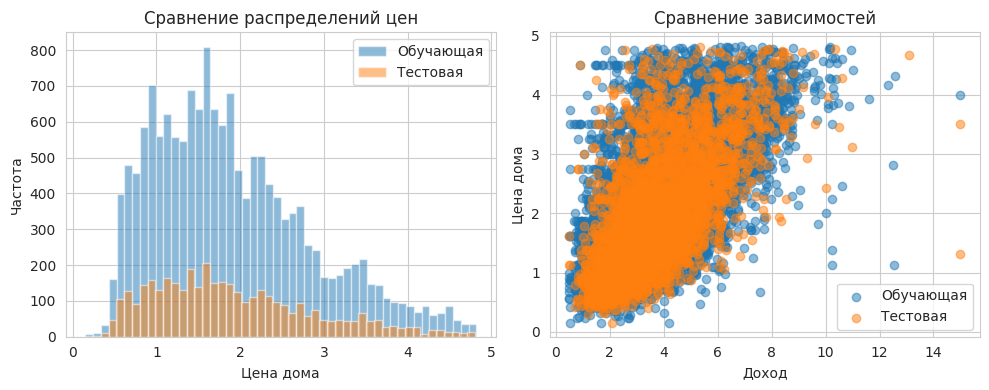

In [ ]:
# Проверка качества разделения выборки
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(california_train['MedianValue'], bins=50, alpha=0.5, label='Обучающая')
plt.hist(california_test['MedianValue'], bins=50, alpha=0.5, label='Тестовая')
plt.xlabel('Цена дома')
plt.ylabel('Частота')
plt.legend()
plt.title('Сравнение распределений цен')

plt.subplot(1, 2, 2)
plt.scatter(california_train['MedInc'], california_train['MedianValue'], alpha=0.5, label='Обучающая')
plt.scatter(california_test['MedInc'], california_test['MedianValue'], alpha=0.5, label='Тестовая')
plt.xlabel('Доход')
plt.ylabel('Цена дома')
plt.legend()
plt.title('Сравнение зависимостей')

plt.tight_layout()
plt.show()

##Разработка структуры регрессора

Вариант №3: Разработать структуру регрессора, где входные данные представляют вектор (60,1), (MLP).

In [ ]:
# Создадим полиномиальные признаки для увеличения размерности до 60
poly = PolynomialFeatures(degree=3, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

print(f"Исходная размерность: {x_train.shape[1]}")
print(f"Размерность после полиномиального преобразования: {x_train_poly.shape[1]}")

Исходная размерность: 8
Размерность после полиномиального преобразования: 164


In [ ]:
# Если размерность больше 60, выбираем первые 60 признаков
if x_train_poly.shape[1] > 60:
    x_train_poly = x_train_poly[:, :60]
    x_test_poly = x_test_poly[:, :60]

In [ ]:
# Масштабируем данные
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_poly)
x_test_scaled = scaler.transform(x_test_poly)

print(f"Финальная размерность: {x_train_scaled.shape[1]}")

Финальная размерность: 60


In [ ]:
# Конструируем MLP регрессор с входным размером (60,))
model = Sequential([
    Input(shape=(60,)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # выходной слой для регрессии
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Выводим структуру модели
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_67 (Dense)                │ (None, 128)            │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,177 (71.00 KB)

 Trainable params: 18,177 (71.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучение модели
print("\nНачало обучения модели...")
history = model.fit(
    x_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)]
)


Начало обучения модели...
Epoch 1/100
392/392 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.9388 - mae: 0.6883 - val_loss: 0.3845 - val_mae: 0.4126
Epoch 2/100
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4194 - mae: 0.4594 - val_loss: 0.3128 - val_mae: 0.3943
Epoch 3/100
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3642 - mae: 0.4327 - val_loss: 0.3296 - val_mae: 0.4048
Epoch 4/100
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3287 - mae: 0.4161 - val_loss: 0.2831 - val_mae: 0.3876
Epoch 5/100
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3153 - mae: 0.4012 - val_loss: 0.2978 - val_mae: 0.3877
Epoch 6/100
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5654 - mae: 0.4186 - val_loss: 0.2801 - val_mae: 0.3753
Epoch 7/100
392/392 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3236 - mae: 0.4007 - val_loss: 0.2782 - val_mae: 0.3781
Epoch 8/100
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3286 - mae: 0.3950 - val_loss: 0.2773 - val_mae: 0.3819
Epoch 9/100
392/392 ━

In [ ]:
# Оценка модели
test_loss, test_mae = model.evaluate(x_test_scaled, y_test, verbose=0)
print(f"\nРезультаты на тестовых данных:")
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

y_pred = model.predict(x_test_scaled).flatten()


Результаты на тестовых данных:
Test MSE: 0.2167
Test MAE: 0.3181
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
# Метрики
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nДетальные метрики:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Интерпретация MAE в долларах
print(f"\nИнтерпретация MAE:")
print(f"MAE в сотнях тысяч: {mae:.4f}")
print(f"MAE в долларах: ${mae * 100000:.0f}")


Детальные метрики:
MSE: 0.2167
RMSE: 0.4655
MAE: 0.3181
R² Score: 0.7676

Интерпретация MAE:
MAE в сотнях тысяч: 0.3181
MAE в долларах: $31806


In [ ]:
# Интерпретация
print(f"\nИнтерпретация:")
print(f"Средняя ошибка: ${mae * 100000:.0f}")
print(f"Модель объясняет {r2 * 100:.1f}% дисперсии цен")


Интерпретация:
Средняя ошибка: $31806
Модель объясняет 76.8% дисперсии цен


In [ ]:
# Сравнение с линейной регрессией
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)

print(f"\nСравнение с Linear Regression:")
print(f"MLP R²: {r2:.4f} vs Linear R²: {lr_r2:.4f}")
print(f"MLP MAE: {mae:.4f} vs Linear MAE: {lr_mae:.4f}")


Сравнение с Linear Regression:
MLP R²: 0.7676 vs Linear R²: 0.6543
MLP MAE: 0.3181 vs Linear MAE: 0.4066


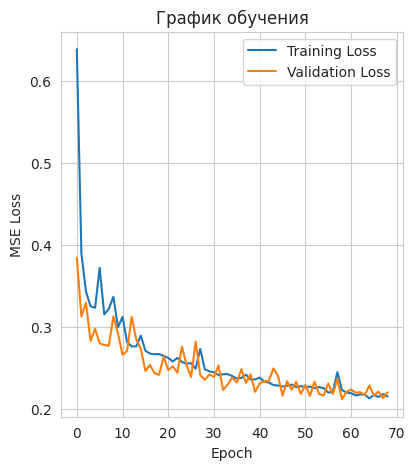

In [ ]:
# Визуализация
plt.figure(figsize=(15, 5))

# График обучения
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('График обучения')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

Text(0.5, 1.0, 'Сравнение предсказаных и реальных значений  (R² = 0.768)')

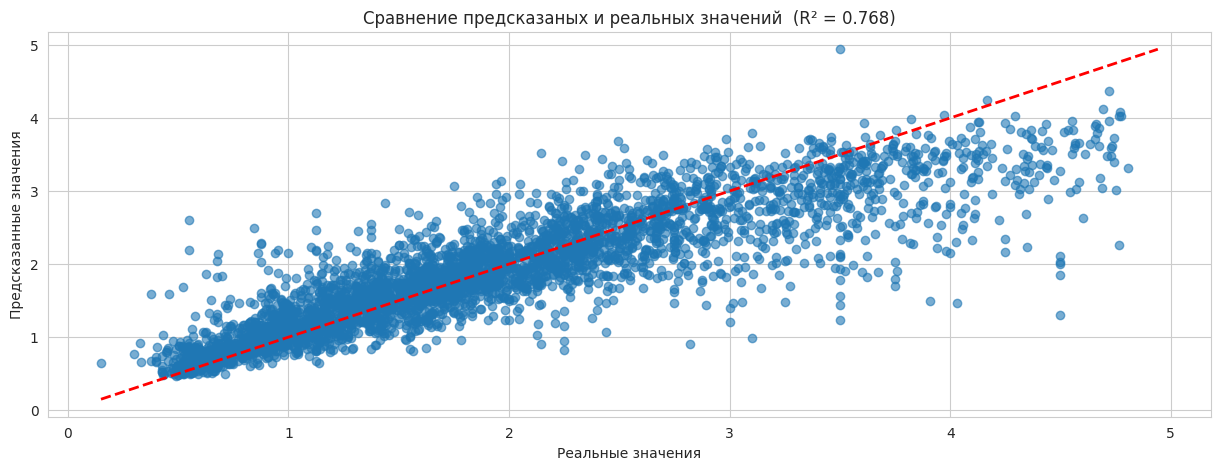

In [ ]:
# Сравнение предсказаных и реальных значений
plt.figure(figsize=(15, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Сравнение предсказаных и реальных значений  (R² = {r2:.3f})')

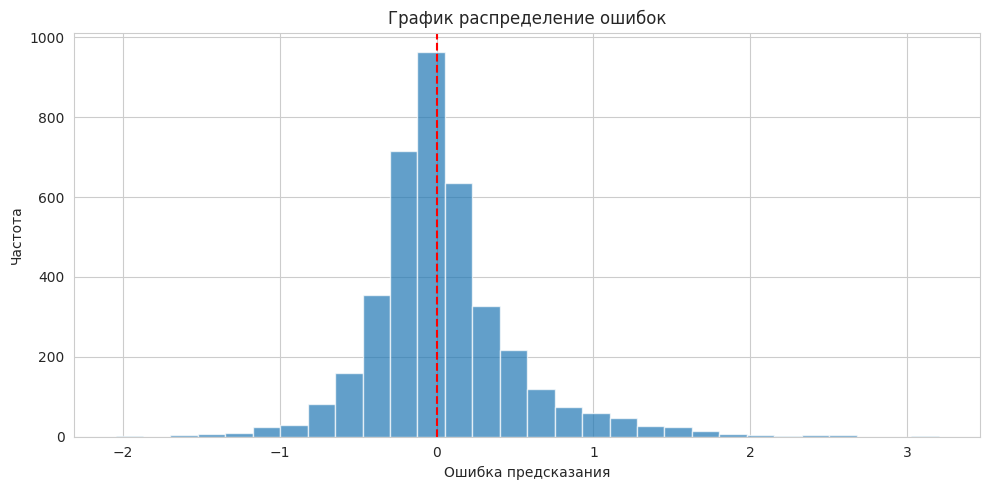

In [ ]:
# Распределение ошибок
plt.figure(figsize=(10, 5))
errors = y_test - y_pred
plt.hist(errors, bins=30, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('График распределение ошибок')

plt.tight_layout()
plt.show()

In [ ]:
# Анализ результатов
if r2 > 0.6:
    print("Модель адекватна!")
elif r2 > 0.4:
    print("Модель среднего качества")
else:
    print("Модель плохого качества")

Модель адекватна!


**Попробуем модель для 8 признаков**

## Конструирование модели для 8 признаков

In [ ]:
# Используем оригинальные 8 признаков из DataSet
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(f"Используем оригинальную размерность: {x_train_scaled.shape[1]} признаков")

Используем оригинальную размерность: 8 признаков


In [ ]:
# Конструируем модель

"""
# Простая модель - результат не очень хороший
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='mse',
              metrics=['mae'])
"""

# Более сложная, добавил слой Dropout (для больбы с переобучением)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1), # Для любопытсва перебираю значения от 0,01 до 0.15
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # линейная активация для регрессии
])

# Компилируем модель
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse',
              metrics=['mae'])

In [ ]:
# Выводим структуру модели
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучение модели
print("\nНачало обучения модели с оригинальными признаками...")
history = model.fit(
    x_train_scaled, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)]
)


Начало обучения модели с оригинальными признаками...
Epoch 1/200
392/392 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.6262 - mae: 0.5549 - val_loss: 0.3180 - val_mae: 0.4041
Epoch 2/200
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3092 - mae: 0.4082 - val_loss: 0.2809 - val_mae: 0.3865
Epoch 3/200
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3155 - mae: 0.4043 - val_loss: 0.2659 - val_mae: 0.3810
Epoch 4/200
392/392 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2853 - mae: 0.3858 - val_loss: 0.2725 - val_mae: 0.3759
Epoch 5/200
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2836 - mae: 0.3839 - val_loss: 0.2703 - val_mae: 0.3734
Epoch 6/200
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2671 - mae: 0.3718 - val_loss: 0.2765 - val_mae: 0.3821
Epoch 7/200
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2689 - mae: 0.3696 - val_loss: 0.2589 - val_mae: 0.3560
Epoch 8/200
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2655 - mae: 0.3688 - val_loss: 0.2453 - val_mae: 0

In [ ]:
# Оценка модели
test_loss, test_mae = model.evaluate(x_test_scaled, y_test, verbose=0)
print(f"\nРезультаты на тестовых данных:")
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

y_pred = model.predict(x_test_scaled).flatten()


Результаты на тестовых данных:
Test MSE: 0.2299
Test MAE: 0.3332
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# Метрики
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nДетальные метрики:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Интерпретация MAE в долларах
print(f"\nИнтерпретация MAE:")
print(f"MAE в сотнях тысяч: {mae:.4f}")
print(f"MAE в долларах: ${mae * 100000:.0f}")


Детальные метрики:
MSE: 0.2299
RMSE: 0.4794
MAE: 0.3332
R² Score: 0.7535

Интерпретация MAE:
MAE в сотнях тысяч: 0.3332
MAE в долларах: $33316


In [ ]:
# Интерпретация
print(f"\nИнтерпретация:")
print(f"Средняя ошибка: ${mae * 100000:.0f}")
print(f"Модель объясняет {r2 * 100:.1f}% дисперсии цен")


Интерпретация:
Средняя ошибка: $33316
Модель объясняет 75.3% дисперсии цен


In [ ]:
# Сравнение с линейной регрессией
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)

print(f"\nСравнение с Linear Regression:")
print(f"MLP R²: {r2:.4f} vs Linear R²: {lr_r2:.4f}")
print(f"MLP MAE: {mae:.4f} vs Linear MAE: {lr_mae:.4f}")


Сравнение с Linear Regression:
MLP R²: 0.7535 vs Linear R²: 0.5745
MLP MAE: 0.3332 vs Linear MAE: 0.4720


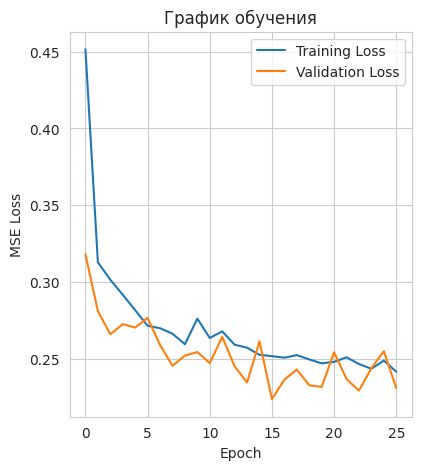

In [ ]:
# Визуализация
plt.figure(figsize=(15, 5))

# График обучения
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('График обучения')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

Text(0.5, 1.0, 'Сравнение предсказаных и реальных значений  (R² = 0.753)')

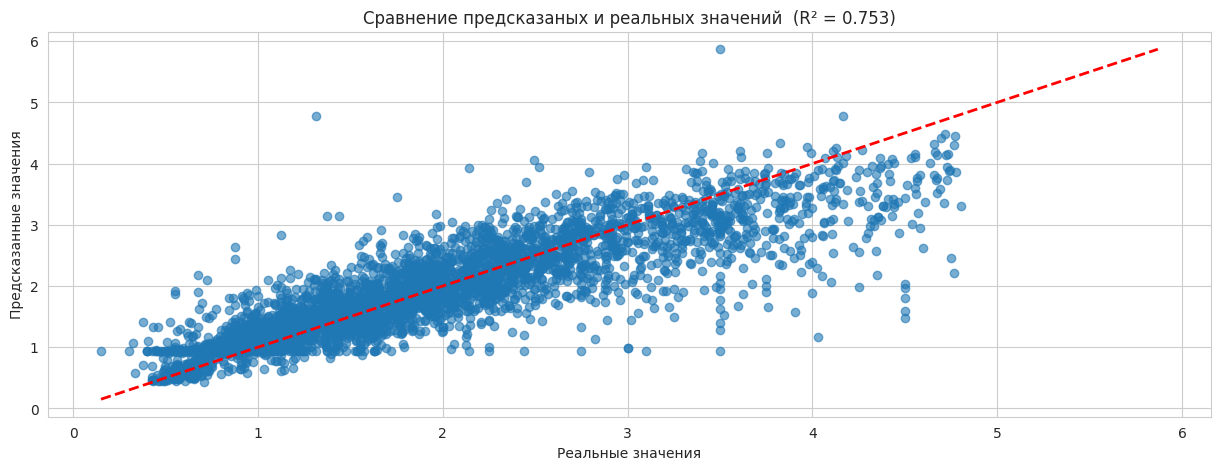

In [ ]:
# Сравнение предсказаных и реальных значений
plt.figure(figsize=(15, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Сравнение предсказаных и реальных значений  (R² = {r2:.3f})')

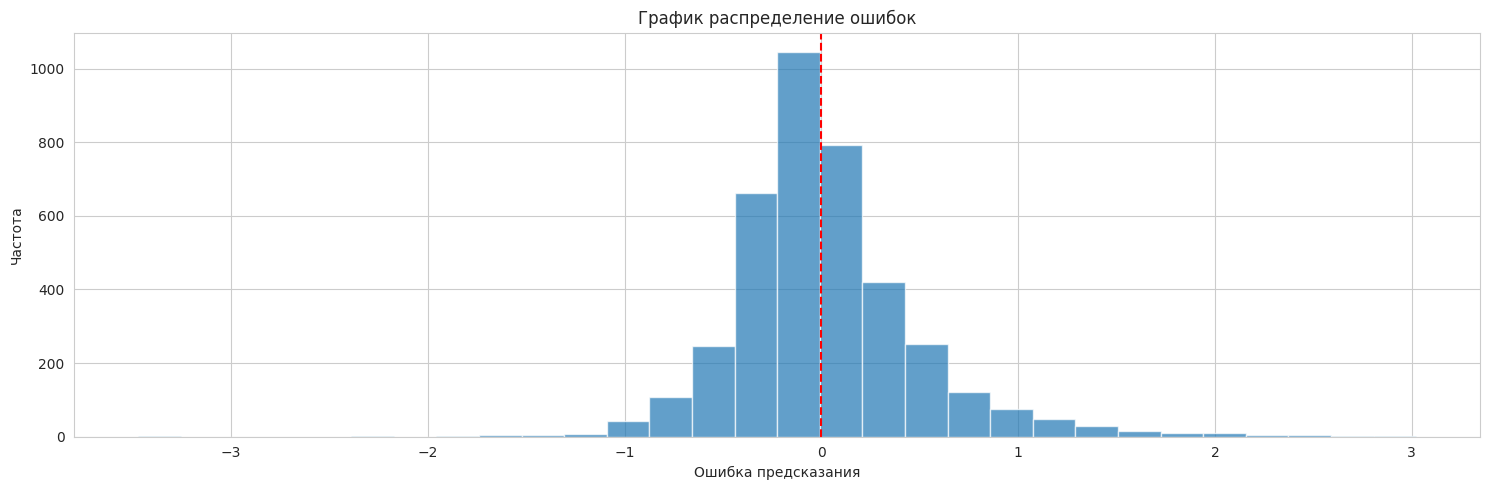

In [ ]:
# Распределение ошибок
plt.figure(figsize=(15, 5))
errors = y_test - y_pred
plt.hist(errors, bins=30, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('График распределение ошибок')

plt.tight_layout()
plt.show()

In [ ]:
# Анализ результатов
if r2 > 0.6:
    print("Модель адекватна!")
elif r2 > 0.4:
    print("Модель среднего качества")
else:
    print("Модель плохого качества")

Модель адекватна!
